# A Demo of the Kriging Convolutional Network

## 1 Data loading and visualization
In this notebook, we will show how to run KCN on the bird dataset from the KCN paper. This section will load the data and visualize them on a map.

In [11]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import data
import argument
import geopandas as gpd
import geoplot as gplt


%matplotlib inline
%load_ext autoreload
%autoreload 2
%autosave 180

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Autosaving every 180 seconds


In [12]:
# Load the data
args = argument.parse_opt()
args.dataset = "bird_count"
trainset, testset = data.load_bird_count_data(args)

values = np.concatenate([trainset.y, trainset.coords], axis=1)

gdf = gpd.GeoDataFrame(values, columns = ['num', 'latitude', 'longitude'],
geometry=gpd.points_from_xy(values[:, 2], values[:, 1]), crs='EPSG:4326')


The following two plots give a quick glimpse of the data. The first chart shows that counts in the dataset are highly sparse, with only 10.6 percent of training records having positive counts. The second plot shows the geographical distribution of the bird counts over east US and Canada.

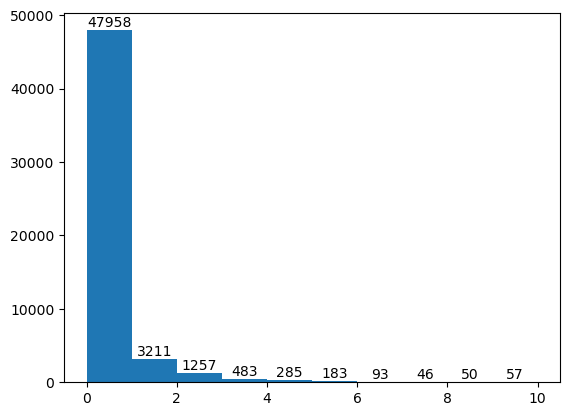

In [13]:
# histogram of bird counts

counts, edges, bars = plt.hist(gdf['num'], bins=10)
bin_val = plt.bar_label(bars)

<GeoAxes: >

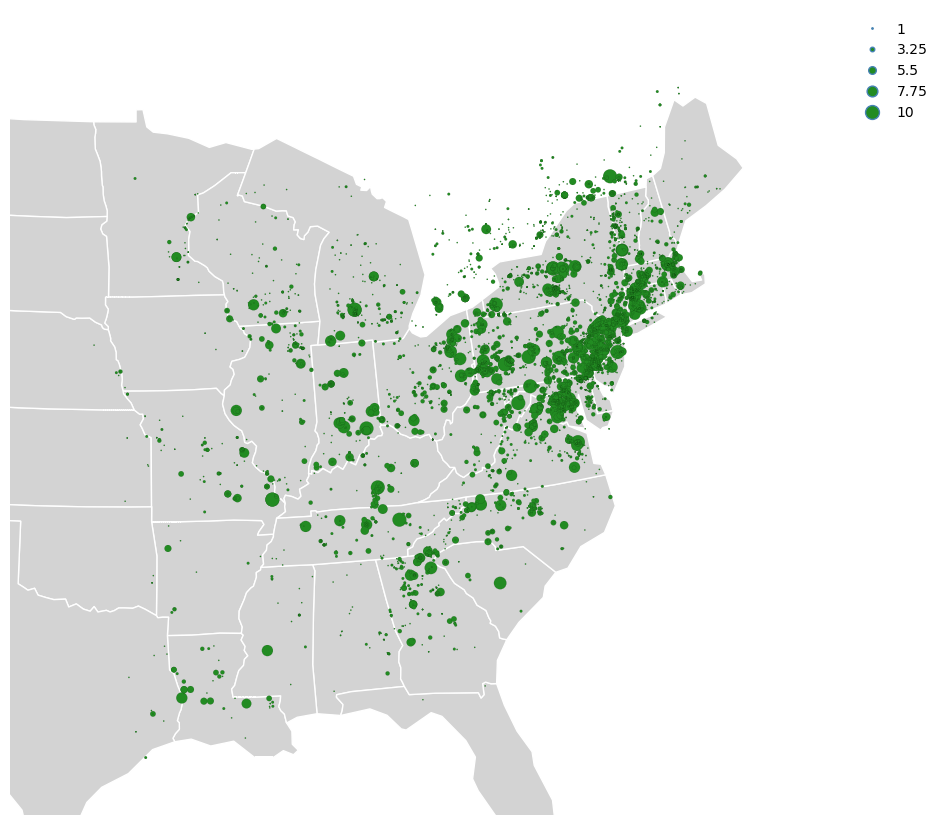

In [14]:
# spatial distribution of positive observations (counts greater than 0)

gdf_pos = gdf[gdf['num'] >= 1]
contiguous_usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa'))
ax = gplt.polyplot(
    contiguous_usa,
    zorder=-1,
    linewidth=1,
    projection=gplt.crs.AlbersEqualArea(),
    edgecolor='white',
    facecolor='lightgray',
    figsize=(12, 12)
)
gplt.pointplot(gdf_pos, ax=ax, color = 'forestgreen', 
    edgecolor='black', linewidth=0.05,
    scale='num', limits=(1, 10),
    legend=True, legend_var='scale',
    legend_kwargs={'frameon': False},
)

## 2 Predicting counts for new locations

In this section, we will train a KCN model with the train set and predict counts for locations in the test set. We put the procedure in `experiment.py`. 

The hyperparameters are set to default values in `argument.py`. If the code is run via a command line, then arguments can be passed in there. Below we test the three models (KCN, KCN-att, and KCN-sage) with the same hyperparameters.

In [22]:
import experiment

In [18]:
args.model = 'kcn'
err = experiment.run_kcn(args)
print('Model: {}, test error: {}\n'.format(args.model, err))

The bird_count dataset has 53623 training instances and 53623 test instances.
Length scale is set to 0.0077334818661507305


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:04<00:00, 170.10it/s]


Epoch: 0, train error: 0.5052866611972844, validation error: 0.5330713987350464


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:03<00:00, 196.00it/s]


Epoch: 1, train error: 0.46797664986286114, validation error: 0.5313043594360352


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:04<00:00, 185.17it/s]


Epoch: 2, train error: 0.4645477042729525, validation error: 0.5138728022575378


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:04<00:00, 178.90it/s]


Epoch: 3, train error: 0.46849420478469445, validation error: 0.518560528755188


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:04<00:00, 163.51it/s]


Epoch: 4, train error: 0.4615341088734567, validation error: 0.516335129737854


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:05<00:00, 128.65it/s]


Epoch: 5, train error: 0.45946040715483066, validation error: 0.5194652676582336


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:05<00:00, 144.68it/s]


Epoch: 6, train error: 0.4566827177829844, validation error: 0.5134445428848267


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:04<00:00, 169.00it/s]


Epoch: 7, train error: 0.4600307681450718, validation error: 0.5161504745483398


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:06<00:00, 119.14it/s]


Epoch: 8, train error: 0.4580427915691153, validation error: 0.5215557813644409


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:06<00:00, 117.97it/s]


Epoch: 9, train error: 0.46030382081670196, validation error: 0.5165681838989258


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:05<00:00, 138.58it/s]


Epoch: 10, train error: 0.45599020047015265, validation error: 0.5188713669776917


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:04<00:00, 163.27it/s]


Epoch: 11, train error: 0.4556987778087588, validation error: 0.5158277750015259


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:04<00:00, 169.87it/s]


Epoch: 12, train error: 0.45462048269416155, validation error: 0.5024051666259766


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:04<00:00, 182.80it/s]


Epoch: 13, train error: 0.45667154264489285, validation error: 0.5111398696899414


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:04<00:00, 153.81it/s]


Epoch: 14, train error: 0.4546163158099118, validation error: 0.5084377527236938


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:04<00:00, 170.30it/s]


Epoch: 15, train error: 0.4546666484914328, validation error: 0.5171402096748352


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:05<00:00, 146.23it/s]


Epoch: 16, train error: 0.45414927960618545, validation error: 0.5223023295402527


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:04<00:00, 159.25it/s]


Epoch: 17, train error: 0.4531619231510711, validation error: 0.5155588388442993


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:05<00:00, 148.88it/s]


Epoch: 18, train error: 0.45166962785695336, validation error: 0.5157908797264099


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:04<00:00, 163.32it/s]


Epoch: 19, train error: 0.45243677043993225, validation error: 0.5083783268928528


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:04<00:00, 163.00it/s]


Epoch: 20, train error: 0.4541214128269961, validation error: 0.5221993923187256


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:04<00:00, 157.46it/s]


Epoch: 21, train error: 0.45413660404615497, validation error: 0.5109624266624451


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:04<00:00, 168.72it/s]


Epoch: 22, train error: 0.4543794365526226, validation error: 0.5133031010627747


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:05<00:00, 141.27it/s]


Epoch: 23, train error: 0.453738819060259, validation error: 0.5051640272140503


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:04<00:00, 159.87it/s]


Epoch: 24, train error: 0.4531030470701425, validation error: 0.5227270126342773


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:04<00:00, 172.67it/s]


Epoch: 25, train error: 0.4555337554873212, validation error: 0.5223150253295898

Early stopping at epoch 25
Test error is 0.46038419008255005
Model: kcn, test error: 0.46038419008255005



In [19]:
args.model = 'kcn_sage'
err = experiment.run_kcn(args)
print('Model: {}, test error: {}\n'.format(args.model, err))

The bird_count dataset has 53623 training instances and 53623 test instances.
Length scale is set to 0.0077334818661507305


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:04<00:00, 176.57it/s]


Epoch: 0, train error: 0.5113861420731011, validation error: 0.5489396452903748


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:04<00:00, 171.61it/s]


Epoch: 1, train error: 0.477870023069217, validation error: 0.5439056754112244


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:04<00:00, 152.35it/s]


Epoch: 2, train error: 0.47032386548817157, validation error: 0.5411363244056702


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:04<00:00, 158.39it/s]


Epoch: 3, train error: 0.46263489195537805, validation error: 0.5426970720291138


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:05<00:00, 149.81it/s]


Epoch: 4, train error: 0.45704263111355864, validation error: 0.528914213180542


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:05<00:00, 146.07it/s]


Epoch: 5, train error: 0.4583383457294028, validation error: 0.5220373272895813


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:05<00:00, 147.05it/s]


Epoch: 6, train error: 0.45463009453868786, validation error: 0.5404686331748962


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:05<00:00, 133.49it/s]


Epoch: 7, train error: 0.4555335210832326, validation error: 0.5278343558311462


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:05<00:00, 142.18it/s]


Epoch: 8, train error: 0.45056411368821403, validation error: 0.5302898287773132


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:04<00:00, 154.20it/s]


Epoch: 9, train error: 0.4558314363251587, validation error: 0.5035244226455688


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:04<00:00, 161.47it/s]


Epoch: 10, train error: 0.452756596621322, validation error: 0.5540468692779541


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:04<00:00, 163.30it/s]


Epoch: 11, train error: 0.4531189552728871, validation error: 0.5278139710426331


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:04<00:00, 168.79it/s]


Epoch: 12, train error: 0.45095877551326624, validation error: 0.5263134837150574


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:05<00:00, 139.21it/s]


Epoch: 13, train error: 0.4515345859586408, validation error: 0.5364109873771667


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:06<00:00, 117.32it/s]


Epoch: 14, train error: 0.45005833443352267, validation error: 0.5234194993972778


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:05<00:00, 151.33it/s]


Epoch: 15, train error: 0.4487338097937601, validation error: 0.5250653028488159


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:04<00:00, 152.62it/s]


Epoch: 16, train error: 0.44510768991649935, validation error: 0.5158606171607971


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:04<00:00, 173.66it/s]


Epoch: 17, train error: 0.445599885814284, validation error: 0.5279512405395508


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:05<00:00, 144.96it/s]


Epoch: 18, train error: 0.44980833277253335, validation error: 0.5259019136428833


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:06<00:00, 125.39it/s]


Epoch: 19, train error: 0.4538050347645032, validation error: 0.5122177004814148


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:06<00:00, 126.23it/s]


Epoch: 20, train error: 0.4455938215048886, validation error: 0.5243801474571228


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:05<00:00, 129.65it/s]


Epoch: 21, train error: 0.4410473630150878, validation error: 0.5093191862106323


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:05<00:00, 136.89it/s]


Epoch: 22, train error: 0.44531374604588275, validation error: 0.5234548449516296


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:05<00:00, 141.04it/s]


Epoch: 23, train error: 0.4433692710302574, validation error: 0.5285583734512329


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:05<00:00, 142.45it/s]


Epoch: 24, train error: 0.4471079633301614, validation error: 0.5092966556549072


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:05<00:00, 142.31it/s]


Epoch: 25, train error: 0.44425165235359027, validation error: 0.5328682661056519


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:04<00:00, 155.08it/s]


Epoch: 26, train error: 0.4427992775055923, validation error: 0.5031325817108154


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:04<00:00, 164.28it/s]


Epoch: 27, train error: 0.44743431005381834, validation error: 0.5231357216835022


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:05<00:00, 140.16it/s]


Epoch: 28, train error: 0.4451774624543951, validation error: 0.5360627174377441


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:05<00:00, 143.87it/s]


Epoch: 29, train error: 0.4477533852460941, validation error: 0.5242953300476074

Early stopping at epoch 29
Test error is 0.45686671137809753
Model: kcn_sage, test error: 0.45686671137809753



In [21]:
args.model = 'kcn_gat'
err = experiment.run_kcn(args)
print('Model: {}, test error: {}\n'.format(args.model, err))

The bird_count dataset has 53623 training instances and 53623 test instances.
Length scale is set to 0.0077334818661507305


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:07<00:00, 101.51it/s]


Epoch: 0, train error: 0.5158632013897755, validation error: 0.5521844625473022


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:11<00:00, 66.30it/s]


Epoch: 1, train error: 0.48013034683505174, validation error: 0.5222802758216858


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:08<00:00, 88.66it/s]


Epoch: 2, train error: 0.4624069272123865, validation error: 0.5031188130378723


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:08<00:00, 93.28it/s]


Epoch: 3, train error: 0.4614731282682011, validation error: 0.5191813707351685


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:08<00:00, 92.83it/s]


Epoch: 4, train error: 0.45760755323510816, validation error: 0.5156357884407043


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:08<00:00, 90.97it/s]


Epoch: 5, train error: 0.4501520435546378, validation error: 0.5024973750114441


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:08<00:00, 91.62it/s]


Epoch: 6, train error: 0.44828181922386745, validation error: 0.5141773819923401


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:09<00:00, 84.32it/s]


Epoch: 7, train error: 0.4465245740708748, validation error: 0.5107062458992004


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:08<00:00, 93.73it/s]


Epoch: 8, train error: 0.4484436252007359, validation error: 0.49345722794532776


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:08<00:00, 92.17it/s]


Epoch: 9, train error: 0.4432265182540409, validation error: 0.4939296245574951


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:08<00:00, 88.14it/s]


Epoch: 10, train error: 0.4460335386426825, validation error: 0.505502462387085


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:08<00:00, 86.09it/s]


Epoch: 11, train error: 0.4457402689823587, validation error: 0.49520620703697205


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:08<00:00, 85.05it/s]


Epoch: 12, train error: 0.44468656514379146, validation error: 0.4914572238922119


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:08<00:00, 90.47it/s]


Epoch: 13, train error: 0.4433819517248163, validation error: 0.4833395481109619


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:08<00:00, 87.86it/s]


Epoch: 14, train error: 0.4478449041048359, validation error: 0.4956621527671814


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:08<00:00, 90.75it/s]


Epoch: 15, train error: 0.44620738989967657, validation error: 0.4923904240131378


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:10<00:00, 75.56it/s]


Epoch: 16, train error: 0.44037395937025153, validation error: 0.5067371726036072


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:09<00:00, 79.65it/s]


Epoch: 17, train error: 0.44471966678913877, validation error: 0.4973323345184326


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:08<00:00, 85.39it/s]


Epoch: 18, train error: 0.44058675509877504, validation error: 0.49687930941581726


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:09<00:00, 82.41it/s]


Epoch: 19, train error: 0.4411525072873031, validation error: 0.5032103657722473


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:08<00:00, 95.00it/s]


Epoch: 20, train error: 0.4415577318715422, validation error: 0.5039175748825073


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:08<00:00, 90.87it/s]


Epoch: 21, train error: 0.44008882743992694, validation error: 0.4974883198738098


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:08<00:00, 85.47it/s]


Epoch: 22, train error: 0.44043141438772804, validation error: 0.5032505989074707


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:08<00:00, 87.17it/s]


Epoch: 23, train error: 0.43900798613842773, validation error: 0.5031169652938843


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:10<00:00, 75.96it/s]


Epoch: 24, train error: 0.43927202734262927, validation error: 0.5075112581253052

Early stopping at epoch 24
Test error is 0.4474114179611206
Model: kcn_gat, test error: 0.4474114179611206

